In [1]:
%load_ext watermark

In [2]:
%watermark -v -d -p sklearn,matplotlib,numpy,pandas

2017-07-19 

CPython 2.7.12
IPython 5.1.0

sklearn 0.18.1
matplotlib 1.5.3
numpy 1.11.3
pandas 0.19.2


***

# Principal Component Analysis for Pima Indians Diabetes

### Loading the Dataset

The dataset is diabetes patients records, diagnostic measurement and the information whether the patient had diabetes or not.<br><br> We use Principal Component Analysis to identify patterns in data, whether there is correlation between variables.

In [3]:
import pandas as pd
data = pd.read_csv('diabetes.csv', header='infer', sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape #Data Size

(768, 9)

We know that the dataset has 9 attributes and 768 observation:
- Attribute 1-8 is predictor in numerical.
- Attribute 9 is outcome in categorical (0: Not diabetic, 1:diabetic).

In [5]:
#split data table into data X and clas labels y
X = data.ix[:,0:8].values
y = data.ix[:,8].values

Our iris dataset is now stored in form of a  $768 \times 8$ matrix where the columns are the different features, and every row represents a separate patient sample.
Each sample row $\mathbf{x}$ can be pictured as a 4-dimensional vector   


$\mathbf{x^T} = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \\ x_6 \\ x_7 \\ x_8 \end{pmatrix} 
= \begin{pmatrix} \text{Pregnancies} \\ \text{Glucose} \\ \text{BloodPressure} \\ \text{SkinThickness} \\ \text{Insulin} \\ \text{BMI} \\ \text{DiabetesPedigreeFunction} \\ \text{Age} \end{pmatrix}$

### Exploratory Visualization

Histograms will help us to visualize the distribution of diabetic and non-diabetic patients along 8 different features.

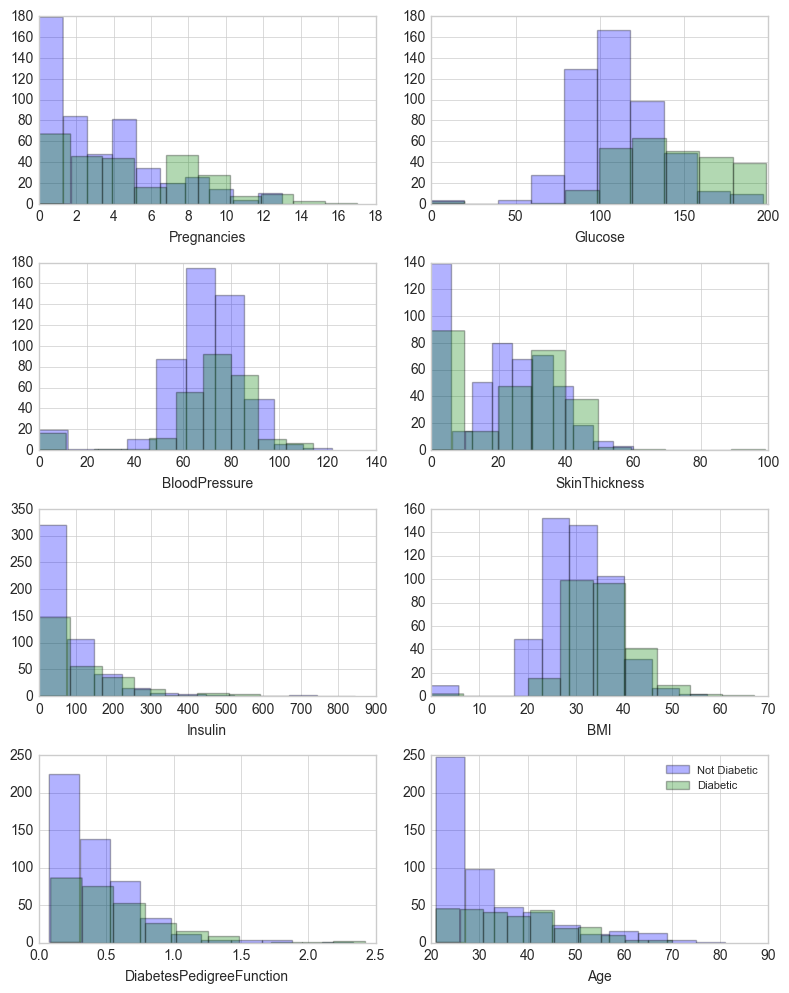

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math

#label name for legend
label_dict = {0: 'Not Diabetic',
              1: 'Diabetic'}

#label name for features
feature_dict = {0: 'Pregnancies',
                1: 'Glucose',
                2: 'BloodPressure',
                3: 'SkinThickness',
                4: 'Insulin',
                5: 'BMI',
                6: 'DiabetesPedigreeFunction',
                7: 'Age'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 10))
    for cnt in range(8):            #The amount of feature we want to plot
        plt.subplot(4, 2, cnt+1)    #subplot we are currently working on
        for lab in ([0],[1]):       #Iteration for every outcome class
            plt.hist(X[y==lab, cnt], #Plot histograms for every outcome class
                     label=label_dict[lab[0]],
                     bins=10,
                     alpha=0.3,) #Histogram transparency
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

### Standardizing 

The diagnostic dataset were measured in different scales, we need to standardized the data set. The data is transformed onto unit scale (mean=0 and variance=1), which is required for the optimal machine learning performance.

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

<br><br>

## 1. Eigendecomposition: Eigenvectors and Eigenvalues 

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA:
- The eigenvectors (principal components) determine the direction of the new feature space.<br>
- The eigenvalue determine their magnitude; it explain the variance of the data along the new feature axes.

### Covariance Matrix 

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a $d \times d$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

We can summarize the calculation of the covariance matrix via the following matrix equation:   
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \sum\limits_{i=1}^n x_{i}.$  
The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std-mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00130378  0.12962746  0.14146618 -0.08177826 -0.07363049  0.01770615
  -0.03356638  0.54505093]
 [ 0.12962746  1.00130378  0.15278853  0.05740263  0.33178913  0.2213593
   0.13751636  0.26385788]
 [ 0.14146618  0.15278853  1.00130378  0.2076409   0.08904933  0.2821727
   0.04131875  0.23984024]
 [-0.08177826  0.05740263  0.2076409   1.00130378  0.43735204  0.39308503
   0.18416737 -0.11411885]
 [-0.07363049  0.33178913  0.08904933  0.43735204  1.00130378  0.19811702
   0.18531222 -0.04221793]
 [ 0.01770615  0.2213593   0.2821727   0.39308503  0.19811702  1.00130378
   0.14083033  0.03628912]
 [-0.03356638  0.13751636  0.04131875  0.18416737  0.18531222  0.14083033
   1.00130378  0.03360507]
 [ 0.54505093  0.26385788  0.23984024 -0.11411885 -0.04221793  0.03628912
   0.03360507  1.00130378]]


Then we perform eigendecomposition on the covariance matrix

In [9]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s ' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]] 

Eigenvalues 
[ 2.09711056  1.73346726  0.42036353  0.40498938  0.68351839  0.76333832
  0.87667054  1.03097228]


### Correlation Matrix 

Eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.

Eigendecomposition of the standardized data based on the correlation matrix:

In [10]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

Eigenvalues 
[ 2.09437995  1.73121014  0.41981618  0.40446205  0.68262839  0.76234439
  0.87552904  1.02962987]


Eigendecomposition of the raw data based on the correlation matrix:

In [11]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

Eigenvalues 
[ 2.09437995  1.73121014  0.41981618  0.40446205  0.68262839  0.76234439
  0.87552904  1.02962987]


All three approaches yield the same eigenvectors and eigenvalue pairs:
    
- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

### Singular Vector Decomposition

Beside eigendecomposition, another way to implement PCA is performing Singular Vector Decomposition to improve computationtal efficiency. The result should be the same with the Eigendecomposition we do earlier.

In [12]:
u,s,v = np.linalg.svd(X_std.T)
print('Vectors U:')
print(u)

Vectors U:
[[-0.1284321   0.59378583 -0.01308692  0.08069115 -0.47560573  0.19359817
   0.58879003  0.11784098]
 [-0.39308257  0.17402908  0.46792282 -0.40432871  0.46632804  0.09416176
   0.06015291  0.45035526]
 [-0.36000261  0.18389207 -0.53549442  0.05598649  0.32795306 -0.6341159
   0.19211793 -0.01129554]
 [-0.43982428 -0.33196534 -0.2376738   0.03797608 -0.48786206  0.00958944
  -0.28221253  0.5662838 ]
 [-0.43502617 -0.25078106  0.33670893 -0.34994376 -0.34693481 -0.27065061
   0.13200992 -0.54862138]
 [-0.45194134 -0.1009598  -0.36186463  0.05364595  0.25320376  0.68537218
   0.03536644 -0.34151764]
 [-0.27061144 -0.122069    0.43318905  0.8336801   0.11981049 -0.08578409
   0.08609107 -0.00825873]
 [-0.19802707  0.62058853  0.07524755  0.0712006  -0.10928996 -0.03335717
  -0.71208542 -0.21166198]]


## 2. Selecting Principal Components 

### Sorting Eigenpairs 

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following:

In [13]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


We need to inspect eigenvectors, so we can drop the eigenvectors with the lowest eigenvalues that bear the least information about the distribution of data.<br>
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$ eigenvectors.

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.09437994529
1.73121014062
1.02962986918
0.875529043808
0.762344385551
0.682628387946
0.419816179706
0.404462047896


### Explained Variance

The explained variance calculated form eigenvalues tells us how much information (variance) can be attributed to each of the principal components.

In [15]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [16]:
var_exp_table = pd.DataFrame(var_exp)
var_exp_table.columns = ['individual explained variance (%)']
print(var_exp_table) #The amount of information every principal component explain

   individual explained variance (%)
0                          26.179749
1                          21.640127
2                          12.870373
3                          10.944113
4                           9.529305
5                           8.532855
6                           5.247702
7                           5.055776


In [17]:
cum_exp_table = pd.DataFrame(cum_var_exp)
cum_exp_table.columns = ['cumulative explained variance (%)']
print(cum_exp_table) #The amount of cumulative information explained by principal components

   cumulative explained variance (%)
0                          26.179749
1                          47.819876
2                          60.690249
3                          71.634362
4                          81.163667
5                          89.696522
6                          94.944224
7                         100.000000


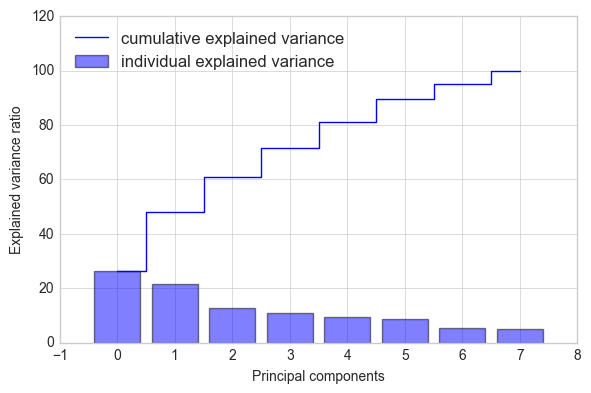

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(8), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

From the plot we know:
1. First principal component shows the most variance information (26.17%)
2. Eighth principal component shoes the least variance information (5.055%)
<br>
Because many principal components bears some information, there's not many principal we can drop without losing too much information.
<br><br>
If we dropped the 8-th principal component, we'll stil get the 94.944% of the information. <font color=green>*For exercise purpose, I will use 2 principal components with the highest information so i can plot it in 2-d. This will only contain 47% of the information.*<font>

### Projection Matrix

We are reducing the 8-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our $d \times k$-dimensional eigenvector matrix $\mathbf{W}$.

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1), 
                      eig_pairs[1][1].reshape(8,1)))

print('Matrix W:')
print(matrix_w)
print(matrix_w.shape)

Matrix W:
[[-0.1284321  -0.59378583]
 [-0.39308257 -0.17402908]
 [-0.36000261 -0.18389207]
 [-0.43982428  0.33196534]
 [-0.43502617  0.25078106]
 [-0.45194134  0.1009598 ]
 [-0.27061144  0.122069  ]
 [-0.19802707 -0.62058853]]
(8L, 2L)


## 3. Projection Onto the New Feature Space

In this last step we will use the $8 \times 2$-dimensional projection matrix $\mathbf{W}$ to transform our samples onto the new subspace via the equation  
$\mathbf{Y} = \mathbf{X} \times  \mathbf{W}$, where $\mathbf{Y}$ is a $768\times 2$ matrix of our transformed samples.

In [20]:
Y = X_std.dot(matrix_w)

In [21]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.1284321  -0.59378583 -0.58879003  0.11784098 -0.19359817  0.47560573
  -0.08069115  0.01308692]
 [-0.39308257 -0.17402908 -0.06015291  0.45035526 -0.09416176 -0.46632804
   0.40432871 -0.46792282]
 [-0.36000261 -0.18389207 -0.19211793 -0.01129554  0.6341159  -0.32795306
  -0.05598649  0.53549442]
 [-0.43982428  0.33196534  0.28221253  0.5662838  -0.00958944  0.48786206
  -0.03797608  0.2376738 ]
 [-0.43502617  0.25078106 -0.13200992 -0.54862138  0.27065061  0.34693481
   0.34994376 -0.33670893]
 [-0.45194134  0.1009598  -0.03536644 -0.34151764 -0.68537218 -0.25320376
  -0.05364595  0.36186463]
 [-0.27061144  0.122069   -0.08609107 -0.00825873  0.08578409 -0.11981049
  -0.8336801  -0.43318905]
 [-0.19802707 -0.62058853  0.71208542 -0.21166198  0.03335717  0.10928996
  -0.0712006  -0.07524755]]

Eigenvalues 
[ 2.09437995  1.73121014  0.41981618  0.40446205  0.68262839  0.76234439
  0.87552904  1.02962987]


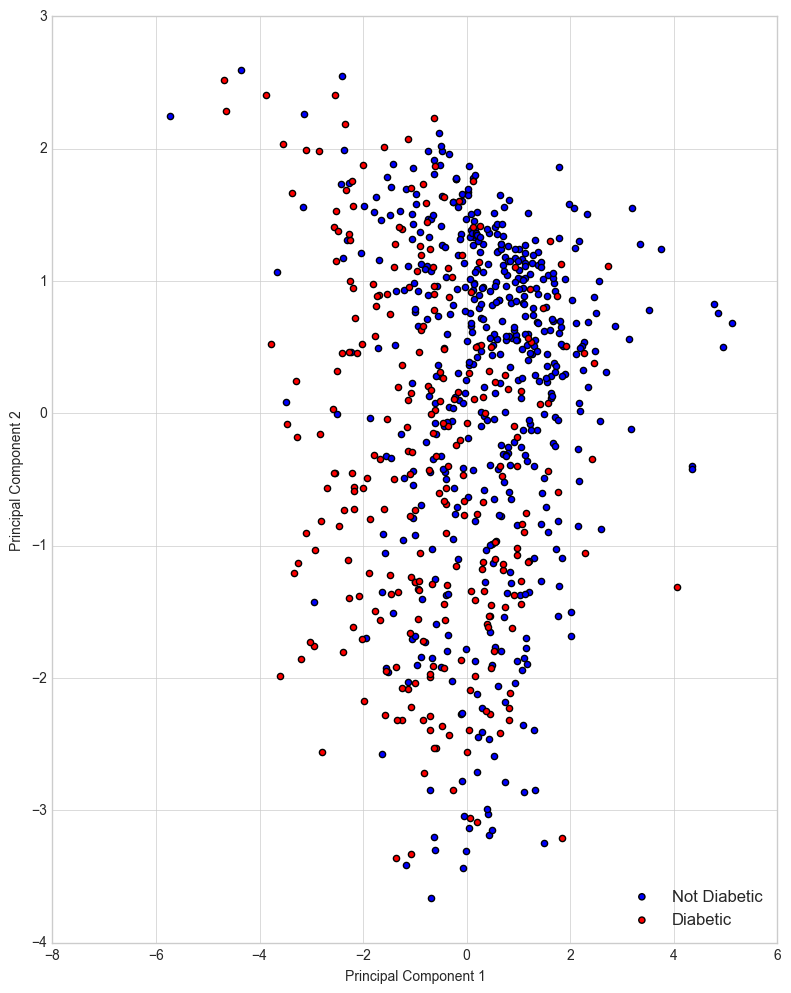

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 10))
    for lab,col in zip(([0],[1]),('blue','red')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=label_dict[lab[0]],
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()